# Reckit Exploratory Data Analysis Document
Prepared by CPT6  
Master of Science in Data Science 2021 
Asian Institute of Management

---

*All rights reserved. No part of this document may be reproduced or transmitted in any form or by any means, or stored in any retrieval system of any nature without prior written permission.*

© 2021

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXECUTIVE SUMMARY </span></div>

This document presents an analysis of Reckitt's different data with regards to sales and product performance on the Lazada and Shopee channels that the company is selling IFCN (Infant and Child Nutrition) products on. To maximize insight on the datasets, look for hidden trends, and test underlying assumptions, exploratory data analysis is performed. This is an essential part of data analysis. In this document, several charts and visualizations are shown to present data regarding sales performance per channel, product performance, click rates, etc. 

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> 1. INTRODUCTION </span></div>

Reckitt, together with its subsidiary Mead Johnson Philippines, is the market leader in sales of baby food in the physical market in the Philippines, ahead of other known brands (Fig.1). Venturing into online retail, Reckitt seeks to establish its foothold in the baby foods market. 

<img src='https://i.imgur.com/f55K8rZ.png'>
<center><i><b>Fig. 1.</b> Baby Food Market in the Philippines</i></center>
<br />
  
  
As such, Reckitt, in undertaking this project, aims to:
1. Identify behavioral patterns and factors that affect consumer purchase in the context of e-commerce
2. Determine the factors that affect consumer’s propensity to purchase online; and,
3. Predict which campaigns will be successful in converting purchases



<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">3. DATA PREPARATION </span></div>

This section loads the datasets for analysis. The datasets will be processed via Python and the Pandas Library.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT

from IPython.display import HTML, display
import pprint

sns.set(style="darkgrid", context="talk")

import warnings
warnings.filterwarnings("ignore")

In [2]:
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}


</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

In [3]:
#read csv files
df_ba = pd.read_csv('sales_data.csv')

df_lz = (pd.read_csv('laz_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))

df_sp = (pd.read_csv('shopee_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))
         
df_sp = df_sp.drop(columns=['Unnamed: 0.1', 'month'])

df_fb = (pd.read_csv('fb_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))

#parse dates
df_ba['date'] = pd.to_datetime(df_ba['date'], format='%Y-%m-%d')
df_lz['date'] = pd.to_datetime(df_lz['date'], format='%Y-%m-%d')
df_sp['date'] = pd.to_datetime(df_sp['date'], format='%Y-%m-%d')
df_fb['date'] = pd.to_datetime(df_fb['date'], format='%Y-%m-%d')

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> 4. EXPLORATORY DATA ANALYSIS </span></div>

This section contains some preprocessing steps and the analysis to gather insights from the various data provided by Reckitt via Exploratory Data Analysis (EDA). As stated above, EDA presents the data in a graphical manner for easier analysis. Each analysis will be augmented with an explanation to aide in clarity.

Note that all insights generated are based from the available data **ONLY**. No external data is fed to the current analysis scope.

### 4.1 Data Preprocessing

As an initial step, multibrands are removed for easier analysis. For example, `Enfagrow`, `Enfamama`, and `Enfamil` are all renamed to a single category `Enfa`.

In [4]:
#remove multibrands
df_lz = df_lz[df_lz.brand_name.isin(['Enfagrow', 'Lactum', 'Sustagen Premium'])]

df_ba['brand'] = df_ba.brand.replace({'Enfagrow': 'Enfa', 'Enfamama': 'Enfa', 
                         'Enfamil': 'Enfa', 'Sustagen Premium': 'Sustagen'})

df_lz['brand_name'] = df_lz.brand_name.replace({'Enfagrow': 'Enfa', 
                                                'Sustagen Premium': 'Sustagen'})

df_sp['brand'] = df_sp.brand.replace({'Enfagrow': 'Enfa', 
                                      'Sustagen Premium': 'Sustagen'})

### 4.2 Data Analysis

#### Sales

In [101]:
dates = pd.date_range(start='January 2019', periods=24)

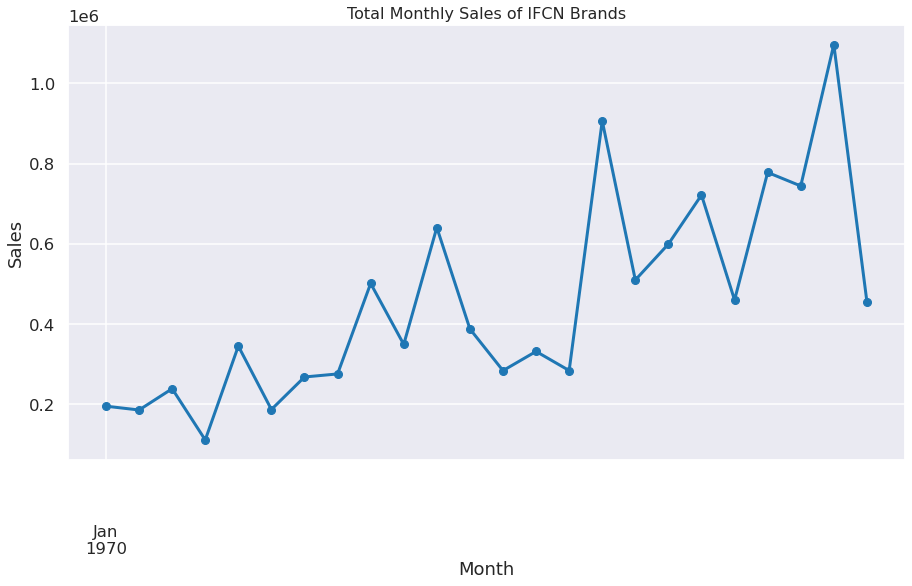

In [115]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)


ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Total Monthly Sales of IFCN Brands', fontsize=16);


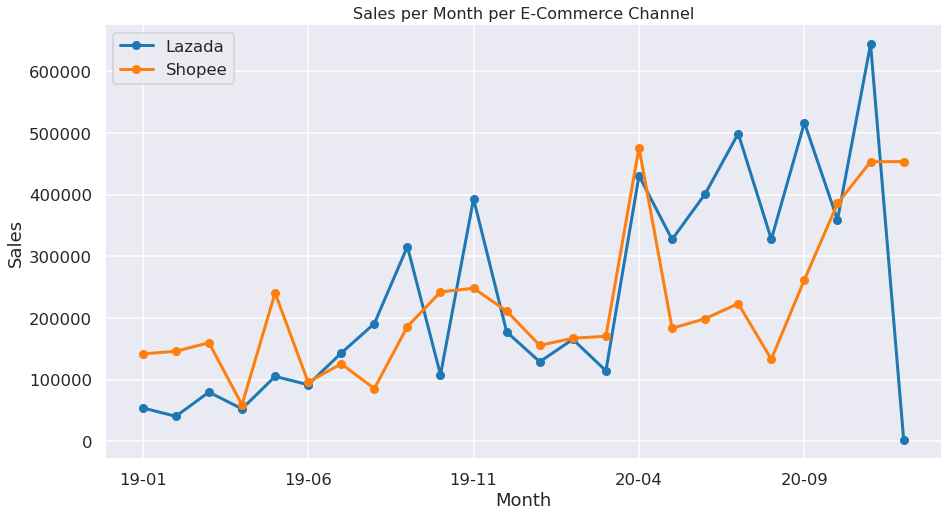

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per E-Commerce Channel', fontsize=16);

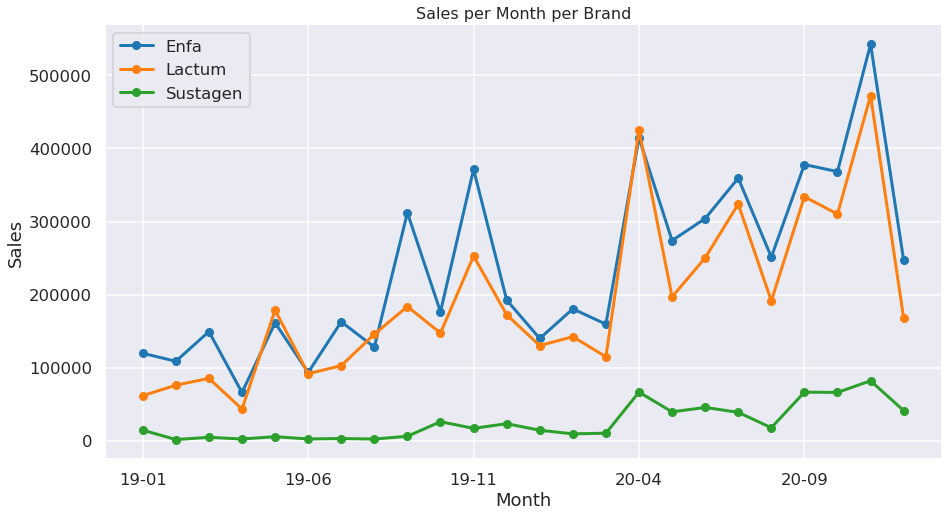

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per Brand', fontsize=16);

## Product Views

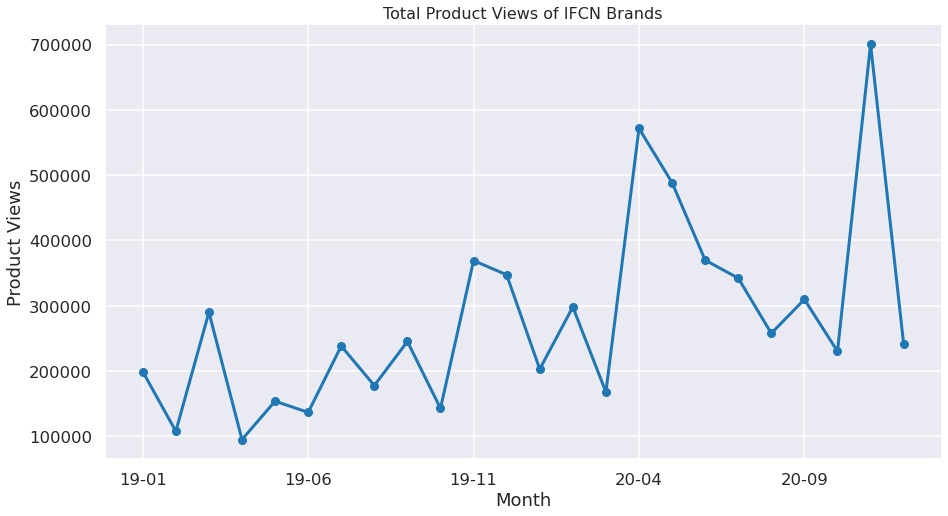

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['product_views'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Total Product Views of IFCN Brands', fontsize=16);

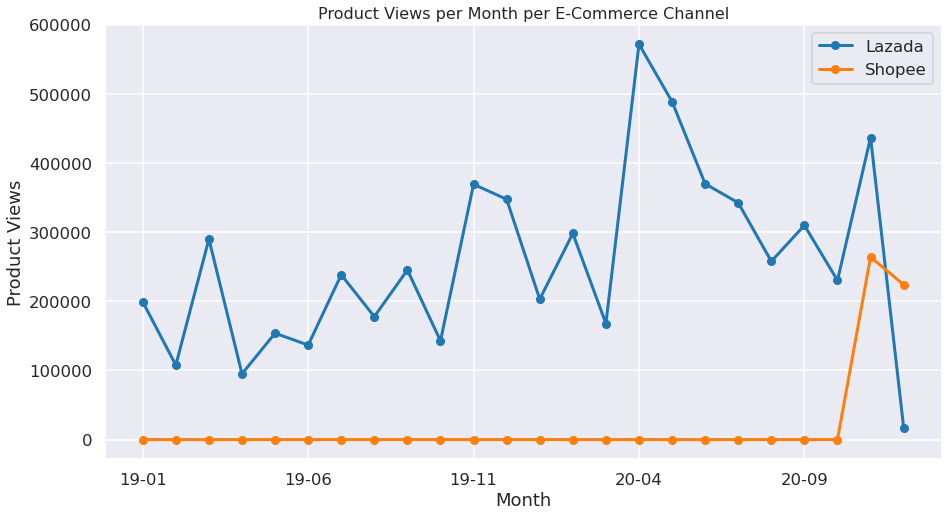

In [9]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Product Views per Month per E-Commerce Channel', fontsize=16);

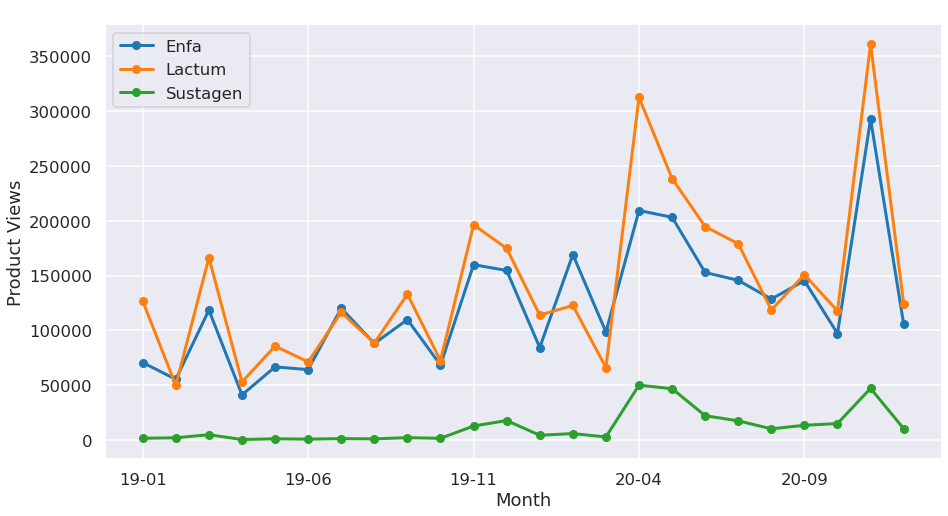

In [10]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title(' ', fontsize=16);

In [11]:
d

brand,Enfa,Lactum,Sustagen
date,,,
19-01,70754,126610,1760
19-02,55473,49985,2195
19-03,118602,166371,4967
19-04,41298,53100,597
19-05,66799,85698,1277
19-06,64299,71326,947
19-07,120306,116537,1429
19-08,88156,88398,1179
19-09,109860,133024,2329


In [12]:
d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d1

date
19-01     54119.58
19-02     11172.81
19-03     61202.13
19-04     12285.60
19-05     35374.64
19-06     34639.96
19-07     71564.81
19-08     57106.64
19-09     55568.64
19-10     33824.84
19-11    169933.83
19-12    152029.69
20-01     43831.06
20-02     80460.00
20-03     13403.25
20-04     86961.06
20-05     68893.86
20-06    103917.09
20-07     59629.50
20-08      4425.55
20-09      3819.75
20-10     65346.58
20-11     99812.39
20-12     99944.54
Name: revenue_usd, dtype: float64

In [13]:
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d2

date
20-01    18834.58
20-02    27804.58
20-03    20551.01
20-04    76576.08
20-05    13575.58
20-06    27866.53
20-07    17409.23
20-08      764.01
20-09     3081.43
20-10    57883.69
20-11    59325.99
20-12    46646.35
Name: gmv_usd, dtype: float64

In [14]:
d1.to_frame().join(d2, on='date')

,revenue_usd,gmv_usd
date,,
19-01,54119.58,NaN
19-02,11172.81,NaN
19-03,61202.13,NaN
19-04,12285.60,NaN
19-05,35374.64,NaN
19-06,34639.96,NaN
19-07,71564.81,NaN
19-08,57106.64,NaN
19-09,55568.64,NaN


## Campaigns

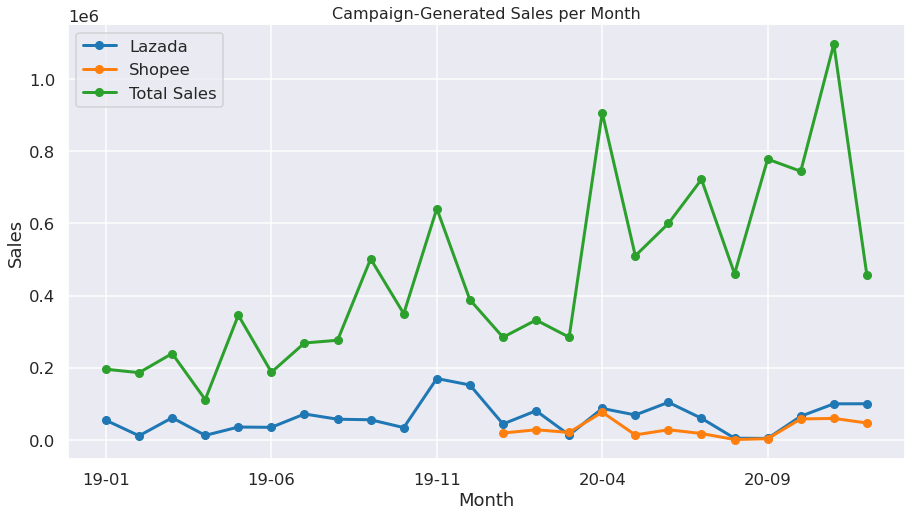

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada', 'gmv_usd':'Shopee', 'sales':'Total Sales'})

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
d['Total Sales'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Sales')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);

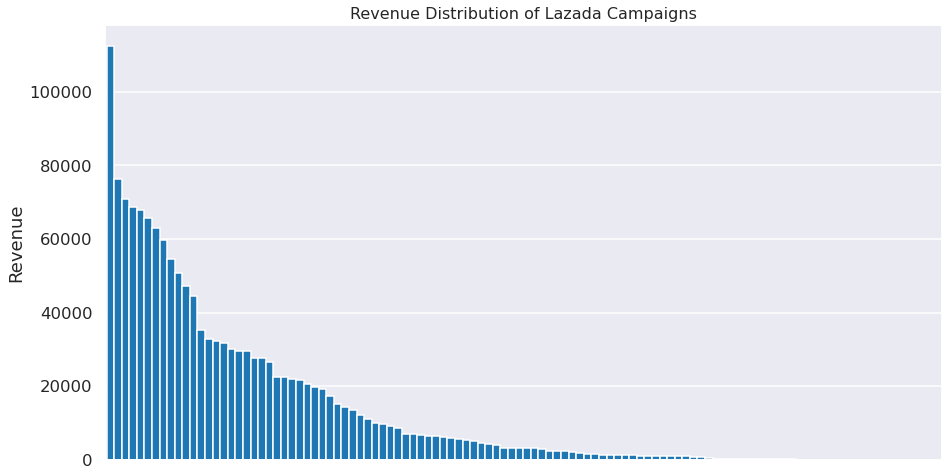

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_lz.groupby('campaign_id').revenue_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign_id')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Lazada Campaigns', fontsize=16);

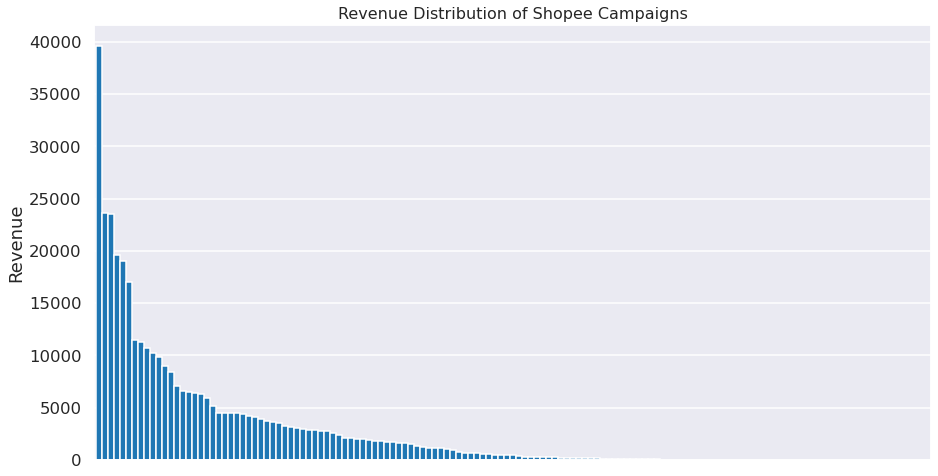

In [17]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_sp.groupby('campaign').gmv_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Shopee Campaigns', fontsize=16);

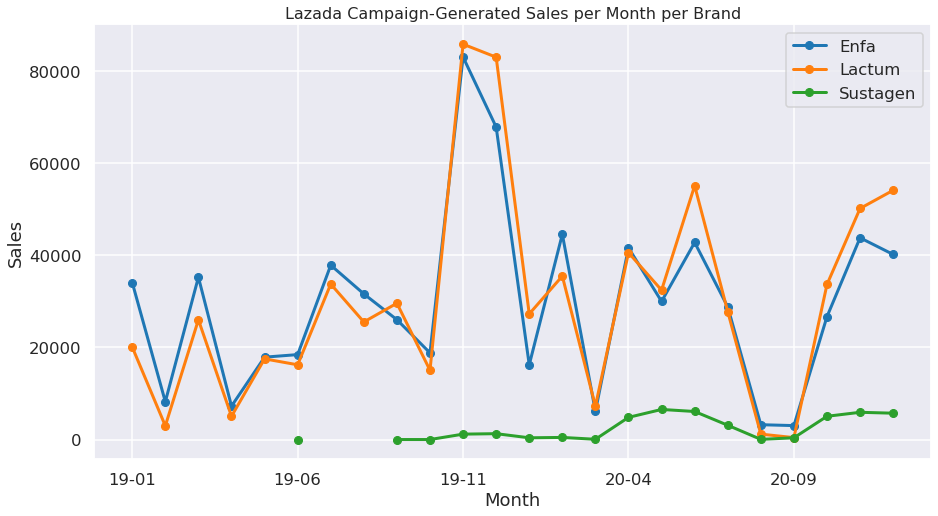

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='revenue_usd', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Sales per Month per Brand', fontsize=16);

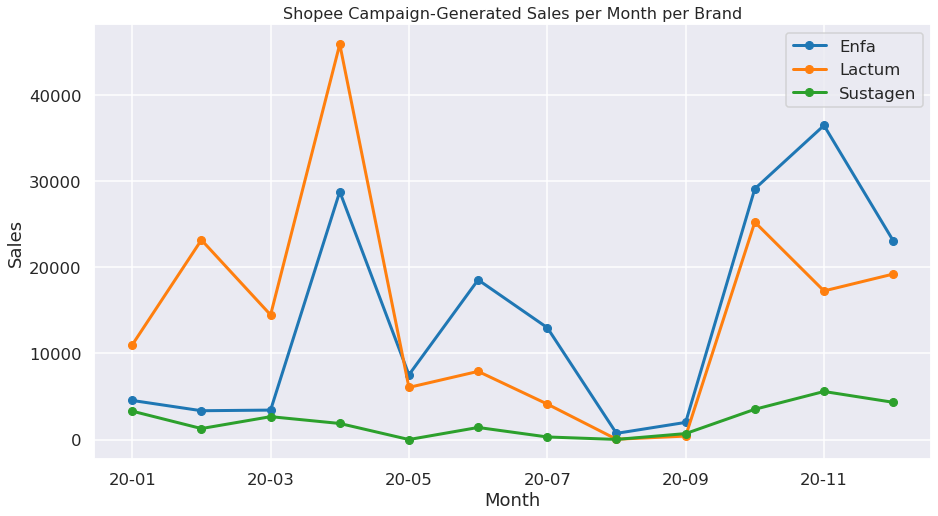

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='gmv_usd', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Sales per Month per Brand', fontsize=16);

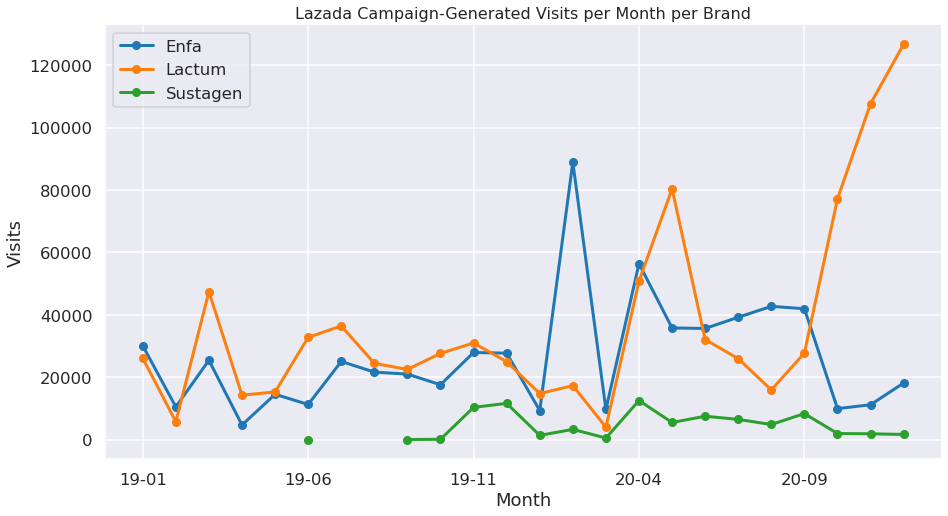

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='visits', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Visits per Month per Brand', fontsize=16);

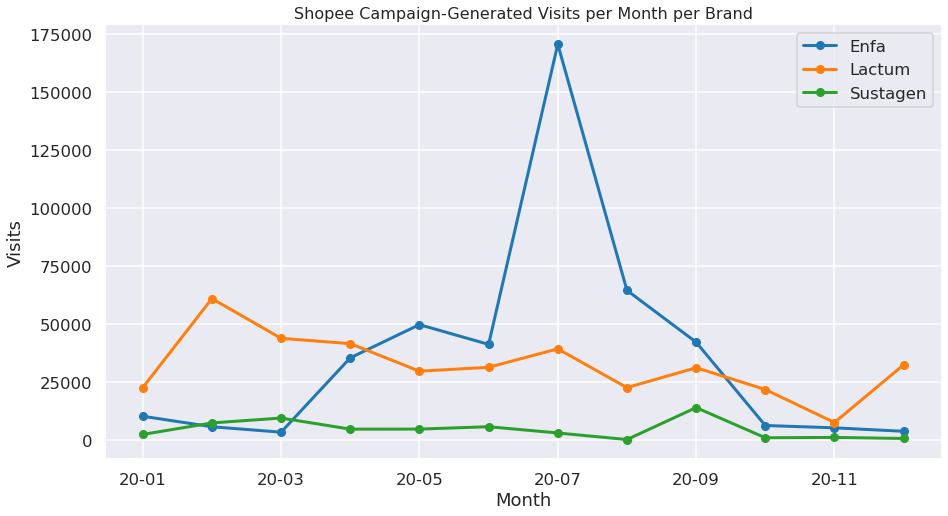

In [21]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='visits', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Visits per Month per Brand', fontsize=16);

## Facebook

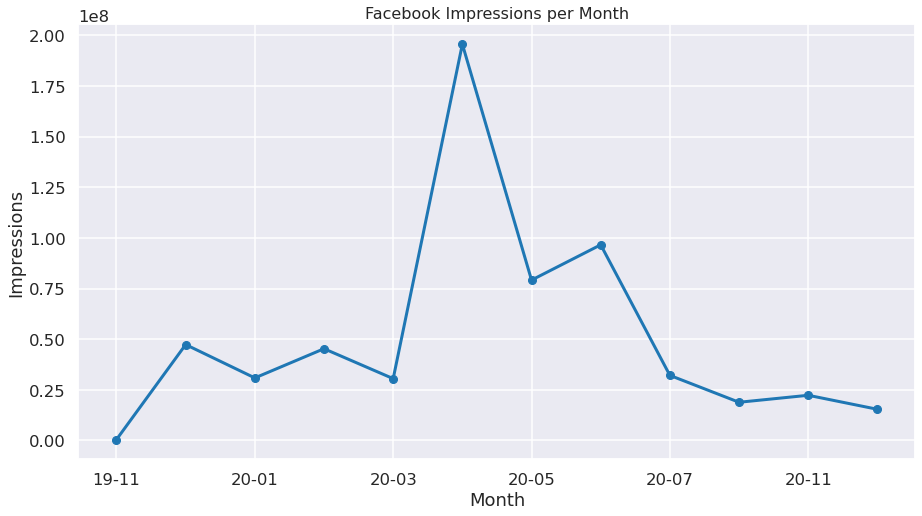

In [22]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['impressions'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Impressions')
ax.set_xlabel('Month')
ax.set_title('Facebook Impressions per Month', fontsize=16);

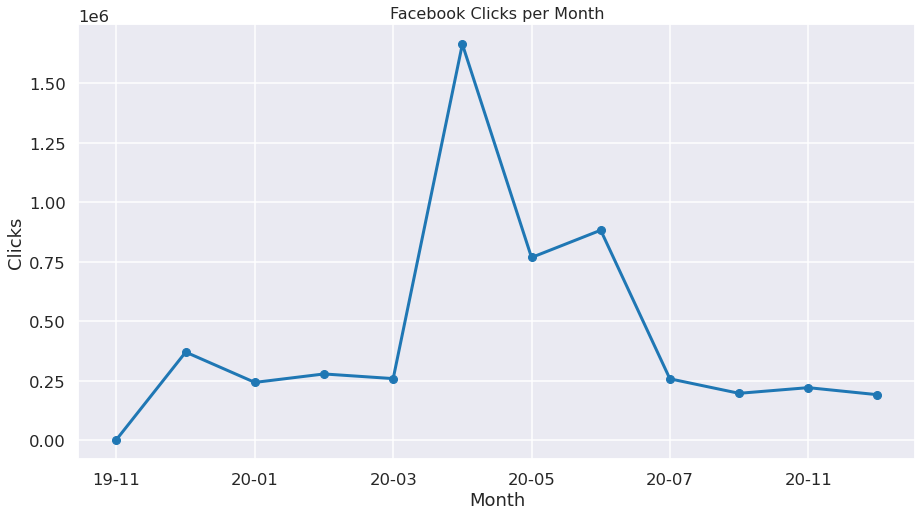

In [23]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Clicks')
ax.set_xlabel('Month')
ax.set_title('Facebook Clicks per Month', fontsize=16);

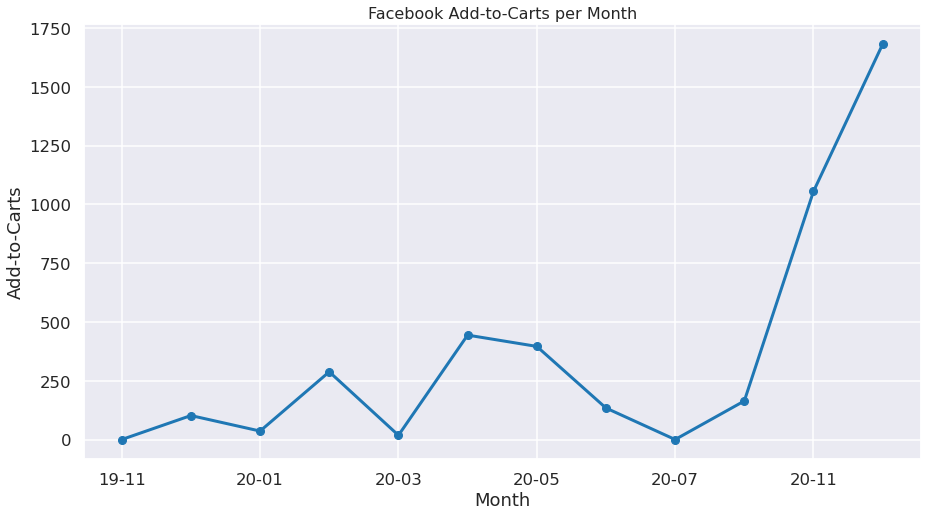

In [24]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['add_cart'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Add-to-Carts')
ax.set_xlabel('Month')
ax.set_title('Facebook Add-to-Carts per Month', fontsize=16);

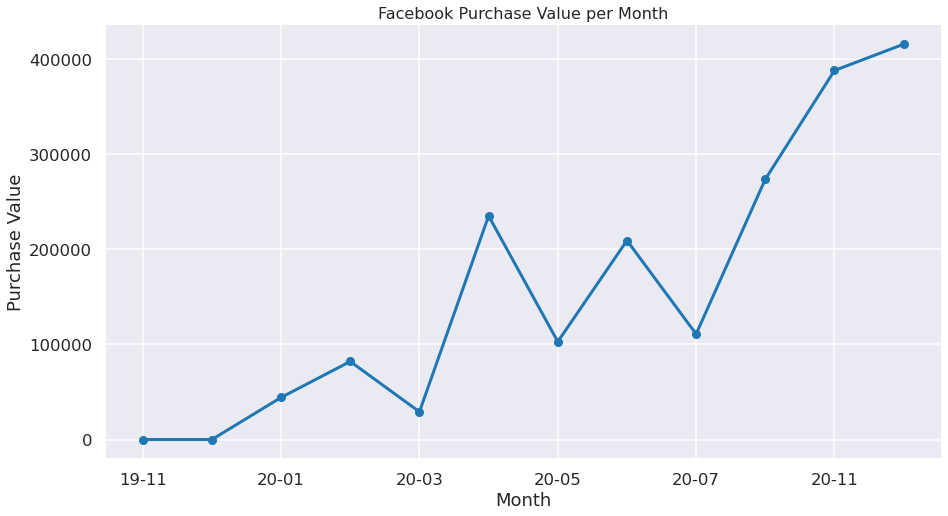

In [25]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['purchase_value'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Purchase Value')
ax.set_xlabel('Month')
ax.set_title('Facebook Purchase Value per Month', fontsize=16);

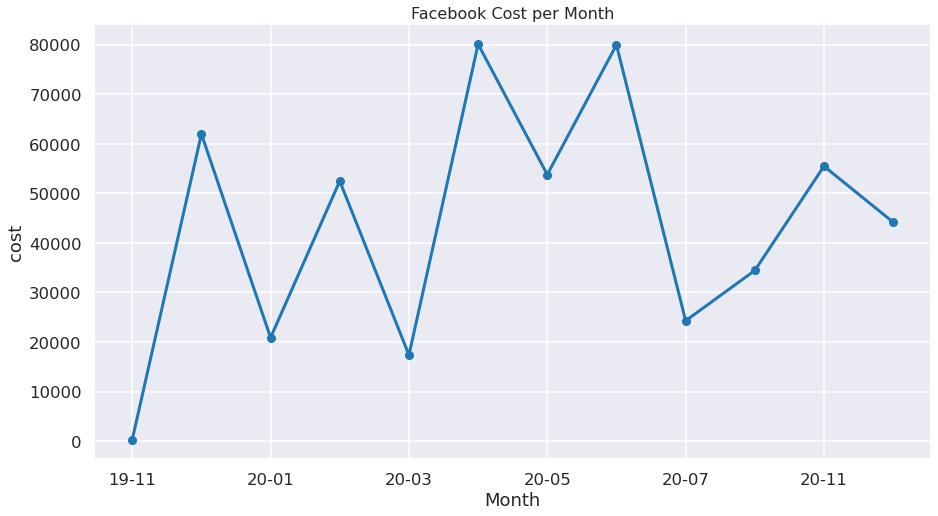

In [26]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('cost')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Month', fontsize=16);

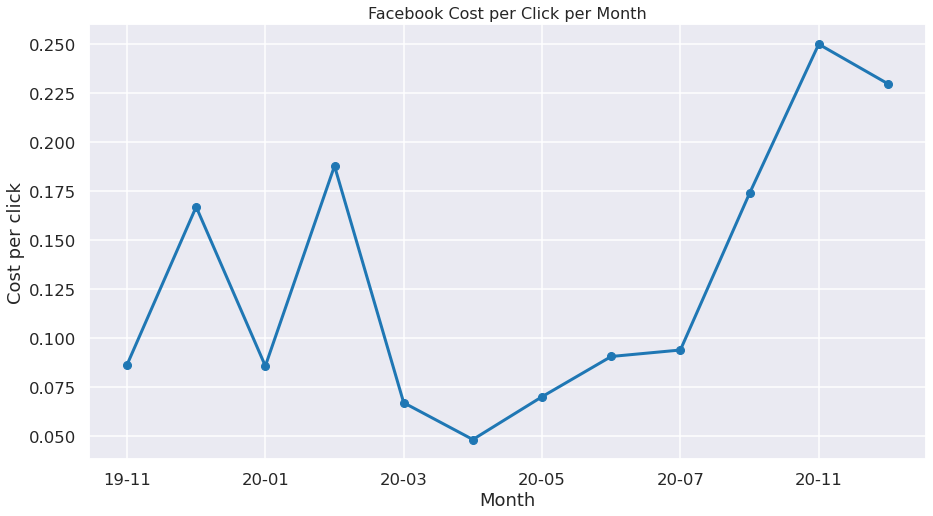

In [27]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()
d2 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d = d1 / d2

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost per click')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Click per Month', fontsize=16);

Text(0.5, 1.0, 'Facebook Cost per Month')

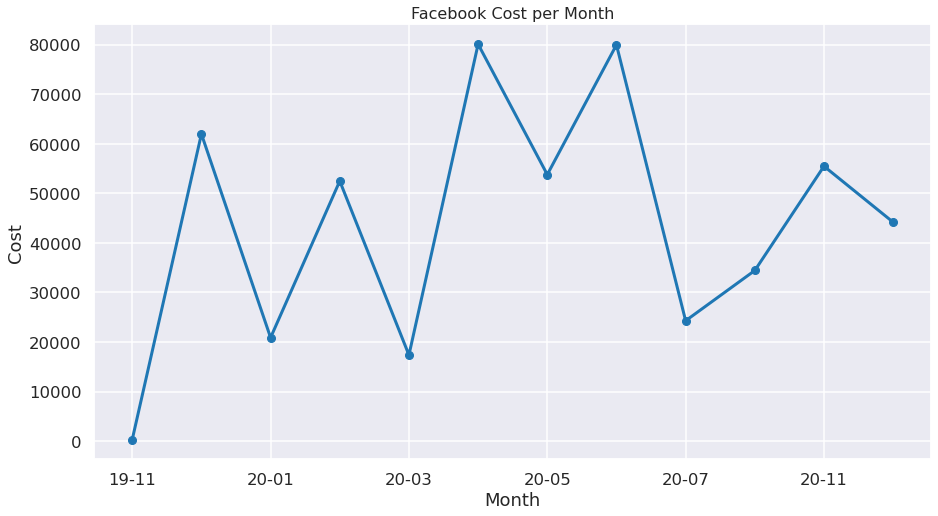

In [28]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)



d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Month', fontsize=16)

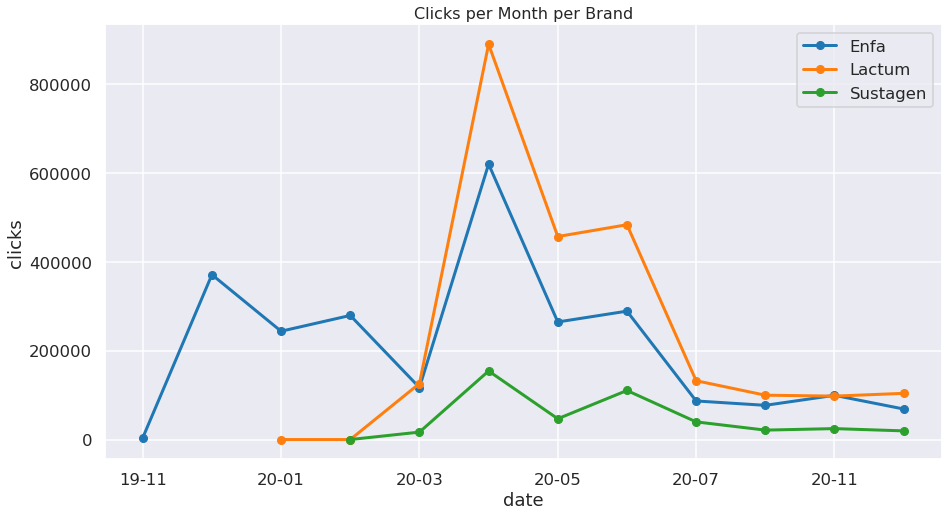

In [29]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_fb, values='clicks', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('clicks')
ax.set_xlabel('date')
ax.set_title('Clicks per Month per Brand', fontsize=16);

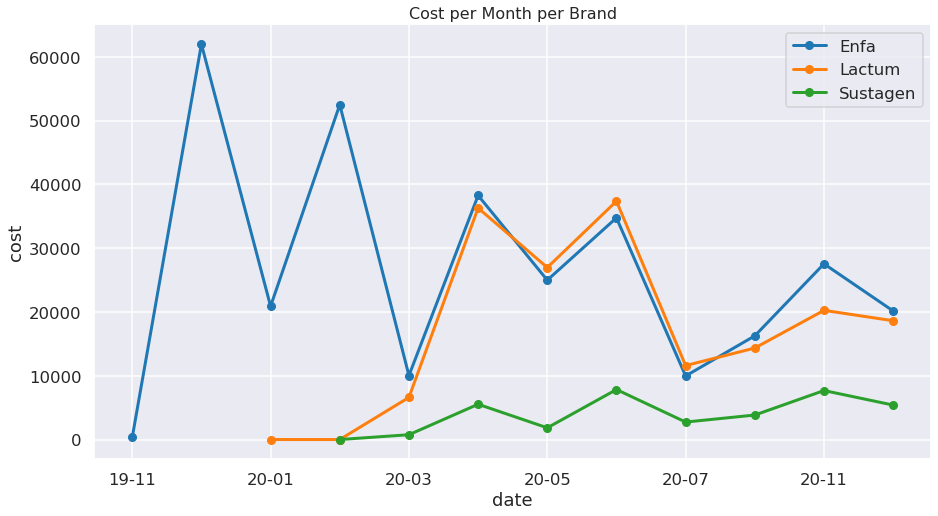

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_fb, values='cost', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('cost')
ax.set_xlabel('date')
ax.set_title('Cost per Month per Brand', fontsize=16);

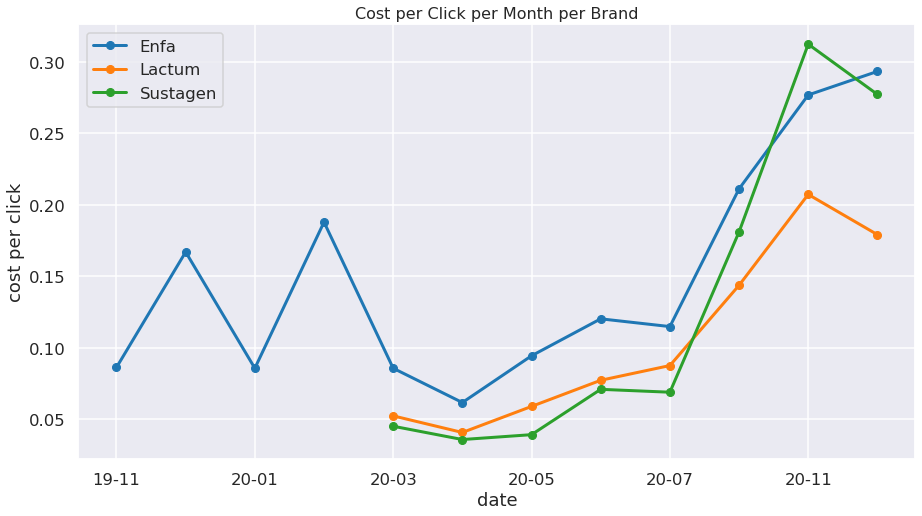

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_fb, values='cost', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)
d2 = pd.pivot_table(df_fb, values='clicks', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum) 

d = d1 / d2

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('cost per click')
ax.set_xlabel('date')
ax.set_title('Cost per Click per Month per Brand', fontsize=16);
